## Text Based Analysis Final Project
## Shiva Nagendra Babu Kore

## Problem Statement¶
 

 You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Let's see an overview of our project

In [122]:
df.shape

(14640, 15)

In [123]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [124]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [125]:
df.describe(include='O')

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,14247,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,5,157,3744


### There is an text column in our dataset so let's try to find the length of each text and make another column for it

In [126]:
df['length'] = df['text'].str.len()
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55


In [127]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
length                              0
dtype: int64

### See let's fill the null values 

In [128]:
df['negativereason'].fillna('Unknown',inplace=True)
df['negativereason_confidence'].fillna(0.000,inplace=True)
df['airline_sentiment_gold'].fillna('Unknown',inplace=True)
df['negativereason_gold'].fillna('Unknown',inplace=True)
df['tweet_coord'].fillna(0.000,inplace=True)
df['tweet_location'].fillna('Unknown',inplace=True)
df['user_timezone'].fillna('Unknown',inplace=True)

In [129]:
df.isna().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
length                          0
dtype: int64

## Analyzing the data using visualization tools

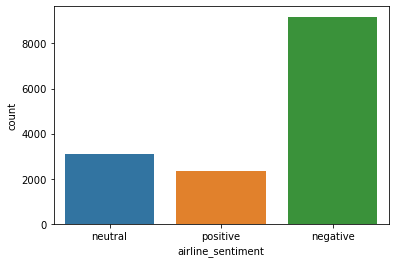

In [130]:
ax = sns.countplot(x="airline_sentiment", data=df)

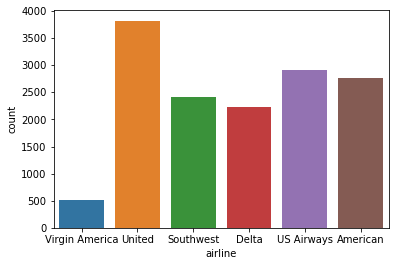

In [131]:
ax = sns.countplot(x="airline", data=df)

### Now Let's  build a pre processing pipleline 

In [132]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [133]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
cleantokens= remove_stop(testtokens)

In [135]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [136]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [137]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length,tokens
0,570306133677760513,neutral,1.0000,Unknown,0.0000,Virgin America,Unknown,cairdin,Unknown,0,@VirginAmerica What @dhepburn said.,0.0,2015-02-24 11:35:52 -0800,Unknown,Eastern Time (US & Canada),35,"[virginamerica, dhepburn, said]"
1,570301130888122368,positive,0.3486,Unknown,0.0000,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica plus you've added commercials t...,0.0,2015-02-24 11:15:59 -0800,Unknown,Pacific Time (US & Canada),72,"[virginamerica, plus, added, commercials, expe..."
2,570301083672813571,neutral,0.6837,Unknown,0.0000,Virgin America,Unknown,yvonnalynn,Unknown,0,@VirginAmerica I didn't today... Must mean I n...,0.0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71,"[virginamerica, today, must, mean, need, take,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica it's really aggressive to blast...,0.0,2015-02-24 11:15:36 -0800,Unknown,Pacific Time (US & Canada),126,"[virginamerica, really, aggressive, blast, obn..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica and it's a really big bad thing...,0.0,2015-02-24 11:14:45 -0800,Unknown,Pacific Time (US & Canada),55,"[virginamerica, really, big, bad, thing]"


In [56]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length,tokens,num_tokens
14635,569587686496825344,positive,0.3487,Unknown,0.0000,American,Unknown,KristenReenders,Unknown,0,@AmericanAir thank you we got on a different f...,0.0,2015-02-22 12:01:01 -0800,Unknown,Unknown,63,"[americanair, thank, got, different, flight, c...",6
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,Unknown,itsropes,Unknown,0,@AmericanAir leaving over 20 minutes Late Flig...,0.0,2015-02-22 11:59:46 -0800,Texas,Unknown,150,"[americanair, leaving, minutes, late, flight, ...",14
14637,569587242672398336,neutral,1.0000,Unknown,0.0000,American,Unknown,sanyabun,Unknown,0,@AmericanAir Please bring American Airlines to...,0.0,2015-02-22 11:59:15 -0800,"Nigeria,lagos",Unknown,60,"[americanair, please, bring, american, airline...",6
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,Unknown,SraJackson,Unknown,0,"@AmericanAir you have my money, you change my ...",0.0,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),135,"[americanair, money, change, flight, answer, p...",9
14639,569587140490866689,neutral,0.6771,Unknown,0.0000,American,Unknown,daviddtwu,Unknown,0,@AmericanAir we have 8 ppl so we need 2 know h...,0.0,2015-02-22 11:58:51 -0800,"dallas, TX",Unknown,138,"[americanair, ppl, need, know, many, seats, ne...",15


## As now we prepared the pipeline structure let's get the word frequency and word cloud of our Data

We use word cloud for analysis of key important tweets in the dataset with respect to data provided

In [138]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length,tokens,num_tokens
14635,569587686496825344,positive,0.3487,Unknown,0.0000,American,Unknown,KristenReenders,Unknown,0,@AmericanAir thank you we got on a different f...,0.0,2015-02-22 12:01:01 -0800,Unknown,Unknown,63,"[americanair, thank, got, different, flight, c...",6
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,Unknown,itsropes,Unknown,0,@AmericanAir leaving over 20 minutes Late Flig...,0.0,2015-02-22 11:59:46 -0800,Texas,Unknown,150,"[americanair, leaving, minutes, late, flight, ...",14
14637,569587242672398336,neutral,1.0000,Unknown,0.0000,American,Unknown,sanyabun,Unknown,0,@AmericanAir Please bring American Airlines to...,0.0,2015-02-22 11:59:15 -0800,"Nigeria,lagos",Unknown,60,"[americanair, please, bring, american, airline...",6
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,Unknown,SraJackson,Unknown,0,"@AmericanAir you have my money, you change my ...",0.0,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),135,"[americanair, money, change, flight, answer, p...",9
14639,569587140490866689,neutral,0.6771,Unknown,0.0000,American,Unknown,daviddtwu,Unknown,0,@AmericanAir we have 8 ppl so we need 2 know h...,0.0,2015-02-22 11:58:51 -0800,"dallas, TX",Unknown,138,"[americanair, ppl, need, know, many, seats, ne...",15


In [140]:
from collections import Counter

counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('united', 4160), ('flight', 3914), ('usairways', 3051), ('americanair', 2963), ('southwestair', 2457)]


In [141]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [142]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
united,4160
flight,3914
usairways,3051
americanair,2963
southwestair,2457
jetblue,2395
get,1339
co,1214
http,1154


This below is word cloud of the tweets from tweeted from New jersey and used airline american airlines

(-0.5, 399.5, 199.5, -0.5)

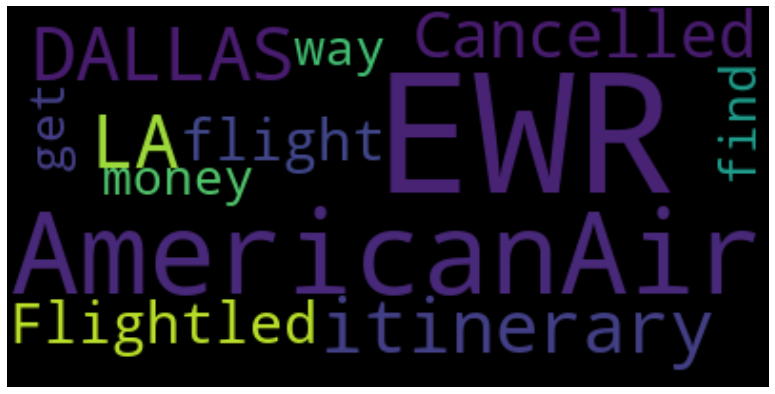

In [143]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df.query("tweet_location=='New Jersey' and airline=='American'")['text'].values[0]

plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

Now lets try to see the word cloud of all words in the tweets with thr frequency of words

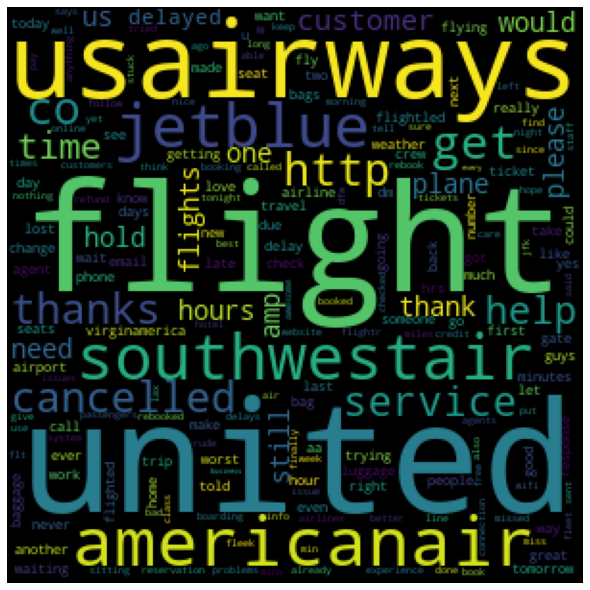

In [144]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='Black', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We'll also try to see the TFIDF word cloud for the data provided

In [145]:
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [146]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

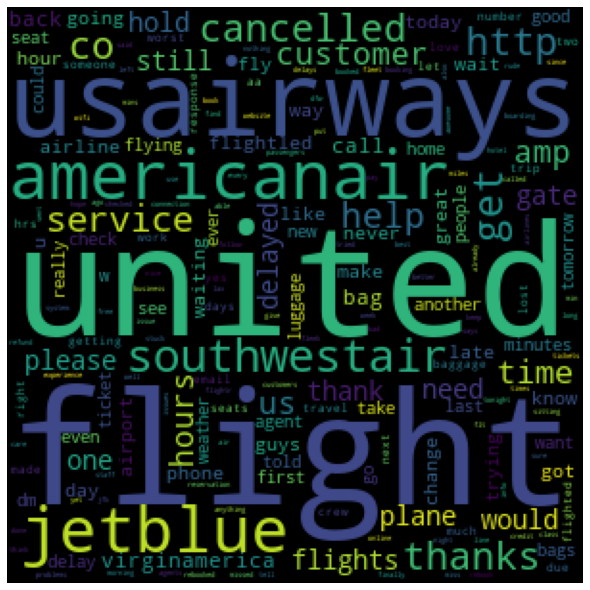

In [147]:
wc = WordCloud(background_color='Black', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [76]:
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',opinion_lexicon.negative()[:10])

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [148]:
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
df.rename(columns={"description": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():word_dict[word] = pos_score
    
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [149]:
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

In [150]:
df['Bing_Liu_Score'] = df['text'].apply(bing_liu_score)

In [151]:
df[["text", 'Bing_Liu_Score']].head(10)

,text,Bing_Liu_Score
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,-1
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,-2
4,@VirginAmerica and it's a really big bad thing...,-1
5,@VirginAmerica seriously would pay $30 a fligh...,-1
6,"@VirginAmerica yes, nearly every time I fly VX...",1
7,@VirginAmerica Really missed a prime opportuni...,-2
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",1
9,"@VirginAmerica it was amazing, and arrived an ...",2


# Topic Modelling
   Now we'll try to do Topic modelling a technique which is used to extract topics or themes from a collection of text documents. It is a statistical method that uses algorithms to automatically identify patterns of words and topics within large volumes of text data.


In [84]:
import re
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

We'll try to vecotize the data frame now

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords,min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape
print(stopwords)

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


{'fifty', 'whatever', "n't", 'someone', 'full', 'can', 'part', 'who', 'below', 'his', 'hereupon', 'upon', 'keep', 'even', 'any', 'after', 'show', 'another', 'whole', 'more', 'i', 'about', 'all', 'also', 'from', 'toward', 'quite', 'because', 'since', 'thence', 'well', 'other', 'them', 'afterwards', 'two', 'during', 'whither', 'front', 'indeed', 'own', 'elsewhere', 'noone', 'eight', 'in', 'yourselves', 'both', 'it', 'does', 'rather', '‘m', 'they', 'sometimes', 'perhaps', 'over', 'done', 'whoever', 'why', 'without', 'always', 'three', 'to', 'are', 'have', 'wherein', "'ll", 'she', 'formerly', 'however', '’d', '’ve', "'m", 'several', 'nevertheless', 'our', 'meanwhile', 'empty', 'these', 'via', 'hers', 'too', 'either', 'its', '‘s', 'up', 'latter', 'alone', 'himself', 'across', 'what', 'just', 'five', 'hundred', 'nor', 'becomes', 'by', 'using', 'such', 'ever', 'whence', 'my', 'beyond', 'under', 'unless', 'hereby', 'should', 'whether', 'everything', 'nine', 'between', 'here', 'eleven', 'you', 

In [90]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,length,tokens,num_tokens,Bing_Liu_Score,paragraphs,number_of_paragraphs
0,570306133677760513,neutral,1.0000,Unknown,0.0000,Virgin America,Unknown,cairdin,Unknown,0,...,0.0,2015-02-24 11:35:52 -0800,Unknown,Eastern Time (US & Canada),35,"[virginamerica, dhepburn, said]",3,0,[@VirginAmerica What @dhepburn said.],1
1,570301130888122368,positive,0.3486,Unknown,0.0000,Virgin America,Unknown,jnardino,Unknown,0,...,0.0,2015-02-24 11:15:59 -0800,Unknown,Pacific Time (US & Canada),72,"[virginamerica, plus, added, commercials, expe...",6,-1,[@VirginAmerica plus you've added commercials ...,1
2,570301083672813571,neutral,0.6837,Unknown,0.0000,Virgin America,Unknown,yvonnalynn,Unknown,0,...,0.0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71,"[virginamerica, today, must, mean, need, take,...",8,0,[@VirginAmerica I didn't today... Must mean I ...,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,Unknown,jnardino,Unknown,0,...,0.0,2015-02-24 11:15:36 -0800,Unknown,Pacific Time (US & Canada),126,"[virginamerica, really, aggressive, blast, obn...",11,-2,[@VirginAmerica it's really aggressive to blas...,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,Unknown,jnardino,Unknown,0,...,0.0,2015-02-24 11:14:45 -0800,Unknown,Pacific Time (US & Canada),55,"[virginamerica, really, big, bad, thing]",5,-1,[@VirginAmerica and it's a really big bad thin...,1


In [92]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'length', 'tokens', 'num_tokens',
       'Bing_Liu_Score', 'paragraphs', 'number_of_paragraphs'],
      dtype='object')

In [94]:
paragraph_df = pd.DataFrame([{ "text": paragraph, "	tweet_created": year }
                             for paragraphs, year in zip(df["paragraphs"], df["tweet_created"])
                               for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

,text,\ttweet_created
0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800
5,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800
6,it's really the only bad thing about flying VA,2015-02-24 11:14:33 -0800
7,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800
8,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800
9,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800


In [97]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords,min_df=5, max_df=0.7)
tfidf_para_vectors =tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(14686, 2819)

In [98]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


I have created an topics  for the data frame using top 5 words of the data

In [154]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],abs(words[largest[i]]*100.0/total)))
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names())


Topic 00
 flight (13.03)
 late (2.56)
 delayed (2.45)
 time (0.99)
 virginamerica (0.94)

Topic 01
 co (17.97)
 http (17.75)
 fleek (6.58)
 fleet (6.54)
 rt (2.58)

Topic 02
 united (12.99)
 thanks (2.10)
 bag (0.84)
 dm (0.82)
 plane (0.62)

Topic 03
 southwestair (16.28)
 thanks (2.44)
 dm (1.61)
 sent (1.09)
 destinationdragons (0.85)

Topic 04
 jetblue (19.81)
 thanks (3.56)
 fleek (1.31)
 fleet (1.20)
 jfk (0.95)

Topic 05
 americanair (16.24)
 thanks (5.97)
 aa (1.06)
 help (0.88)
 dfw (0.74)

Topic 06
 thank (56.88)
 great (3.08)
 virginamerica (1.39)
 response (1.37)
 ok (1.31)

Topic 07
 usairways (11.16)
 hold (1.83)
 hours (1.26)
 help (1.16)
 hour (0.83)

Topic 08
 service (14.02)
 customer (12.71)
 worst (2.29)
 great (1.45)
 terrible (1.45)

Topic 09
 cancelled (12.93)
 flightled (9.37)
 flights (4.65)
 flighted (3.45)
 help (2.69)


## NMF Modelling 

In [155]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names())

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic 00
 flight (13.04)
 late (2.56)
 delayed (2.44)
 time (0.99)
 virginamerica (0.96)

Topic 01
 co (18.63)
 http (18.42)
 fleek (6.38)
 fleet (6.35)
 rt (2.48)

Topic 02
 united (13.02)
 thanks (2.09)
 bag (0.84)
 dm (0.82)
 time (0.61)

Topic 03
 jetblue (19.86)
 thanks (3.48)
 fleek (1.43)
 fleet (1.31)
 jfk (0.94)

Topic 04
 southwestair (16.26)
 thanks (2.44)
 dm (1.61)
 sent (1.09)
 destinationdragons (0.85)

Topic 05
 americanair (16.24)
 thanks (6.03)
 aa (1.06)
 help (0.88)
 dfw (0.74)

Topic 06
 thank (57.14)
 great (3.07)
 virginamerica (1.39)
 response (1.36)
 ok (1.32)

Topic 07
 usairways (11.16)
 hold (1.83)
 hours (1.26)
 help (1.15)
 hour (0.83)

Topic 08
 service (14.02)
 customer (12.69)
 worst (2.29)
 great (1.45)
 terrible (1.45)

Topic 09
 cancelled (12.91)
 flightled (9.35)
 flights (4.64)
 flighted (3.45)
 help (2.71)


#### SO we'll try to see the topic word cloud which we created from topic modelling

In [102]:
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

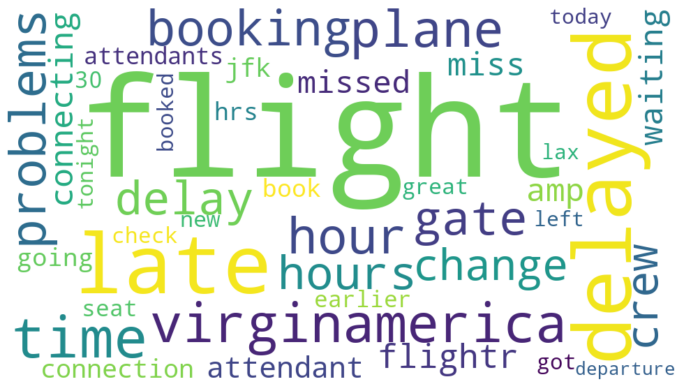

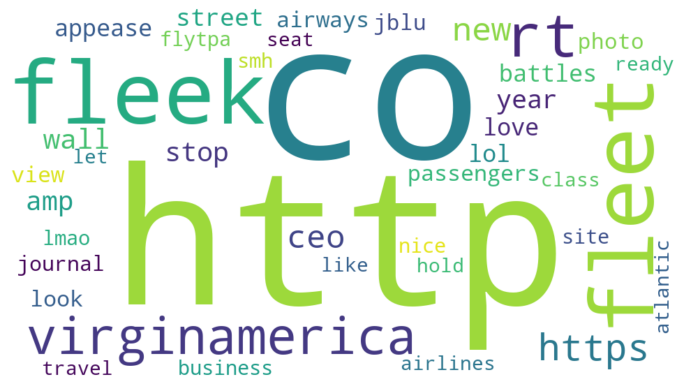

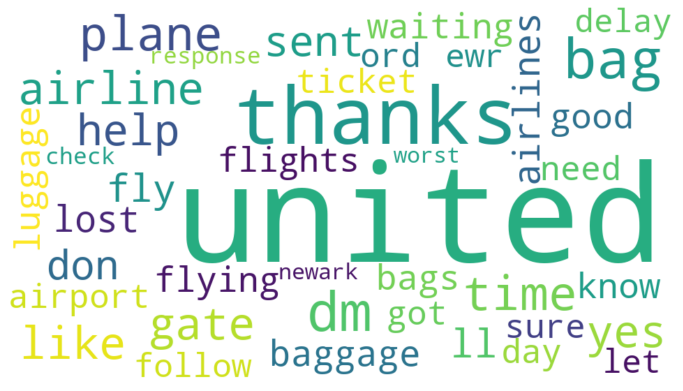

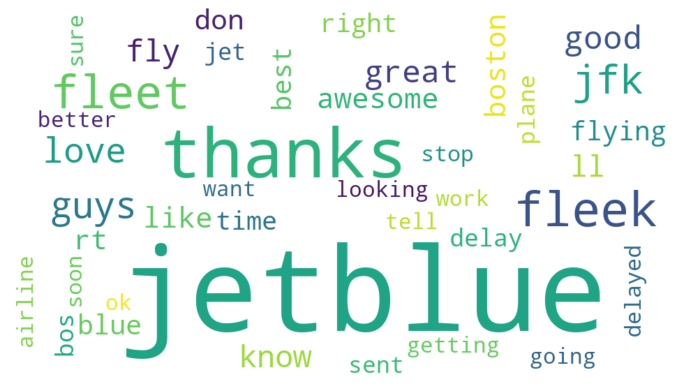

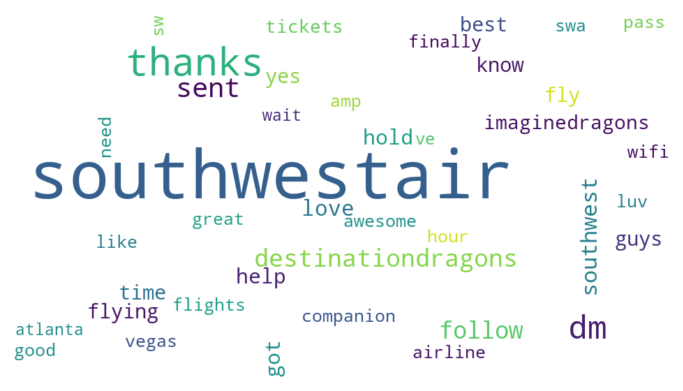

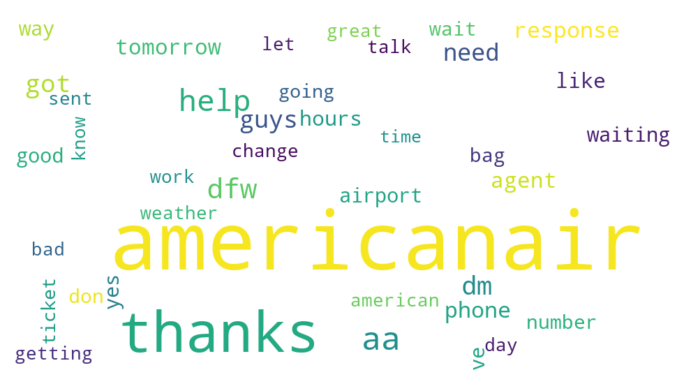

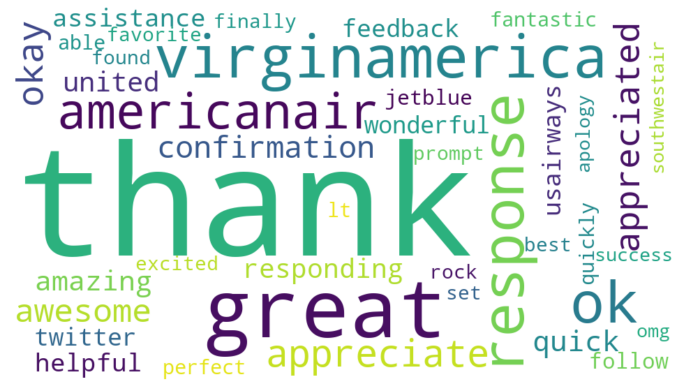

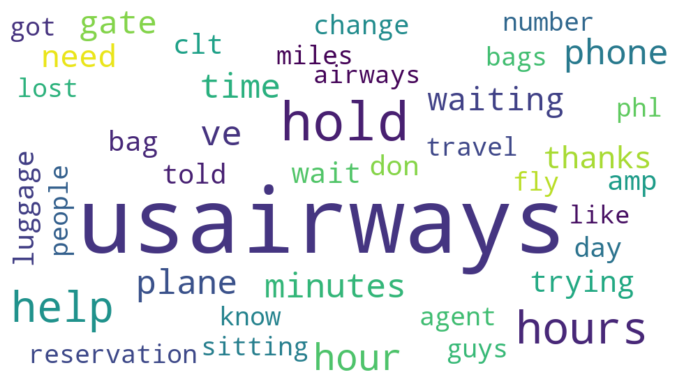

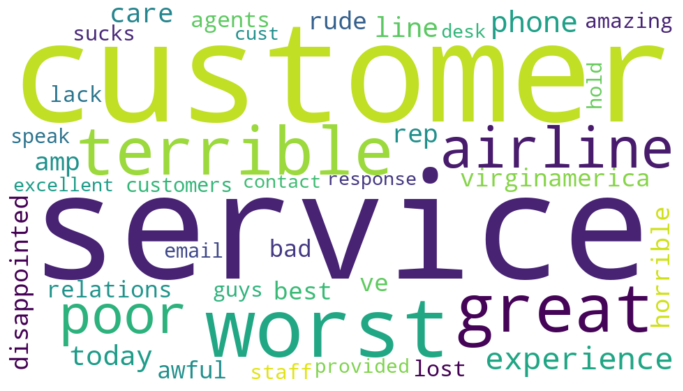

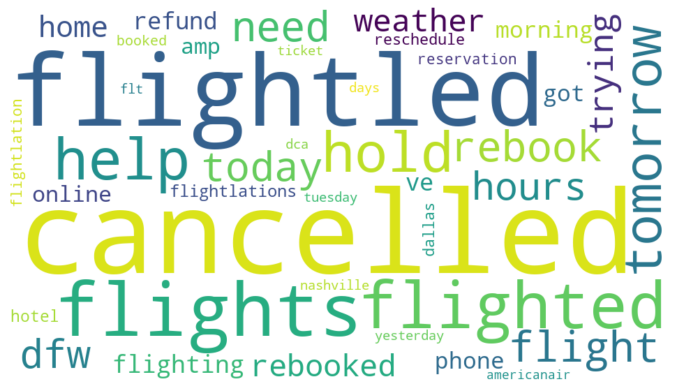

In [103]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names())

## Now lets try to do  some Modelling  to our dataset

In [166]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(nltk.corpus.stopwords.words('english'))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [167]:
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))

In [170]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length,tokens,num_tokens,Bing_Liu_Score,clean_tweet
0,570306133677760513,neutral,1.0000,Unknown,0.0000,Virgin America,Unknown,cairdin,Unknown,0,@VirginAmerica What @dhepburn said.,0.0,2015-02-24 11:35:52 -0800,Unknown,Eastern Time (US & Canada),35,"[virginamerica, dhepburn, said]",3,0,virginamerica dhepburn said
1,570301130888122368,positive,0.3486,Unknown,0.0000,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica plus you've added commercials t...,0.0,2015-02-24 11:15:59 -0800,Unknown,Pacific Time (US & Canada),72,"[virginamerica, plus, added, commercials, expe...",6,-1,virginamerica plus added commercials experienc...
2,570301083672813571,neutral,0.6837,Unknown,0.0000,Virgin America,Unknown,yvonnalynn,Unknown,0,@VirginAmerica I didn't today... Must mean I n...,0.0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71,"[virginamerica, today, must, mean, need, take,...",8,0,virginamerica today must mean need take anothe...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica it's really aggressive to blast...,0.0,2015-02-24 11:15:36 -0800,Unknown,Pacific Time (US & Canada),126,"[virginamerica, really, aggressive, blast, obn...",11,-2,virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica and it's a really big bad thing...,0.0,2015-02-24 11:14:45 -0800,Unknown,Pacific Time (US & Canada),55,"[virginamerica, really, big, bad, thing]",5,-1,virginamerica really big bad thing


In [171]:
x = df.clean_tweet
y = df.airline_sentiment
print(len(x), len(y))


14640 14640


#### Train test split our Data

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

10980 10980
3660 3660


In [175]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [176]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)


In [177]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

## Model Building

In [180]:
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)

In [182]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [183]:
accuracy_score(y_test,pred)

0.7729508196721312

In [186]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      2340
     neutral       0.56      0.54      0.55       738
    positive       0.72      0.70      0.71       582

    accuracy                           0.77      3660
   macro avg       0.71      0.70      0.71      3660
weighted avg       0.77      0.77      0.77      3660

